In [1]:
import os
import datetime
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import urllib.parse
import matplotlib.pyplot as plt

load_dotenv()
POSTGRES_USERNAME = os.environ.get('JDB_USER')
POSTGRES_PASSWORD = os.environ.get('JDB_PASSWORD')
POSTGRES_ADDRESS = os.environ.get('JDB_HOST')
POSTGRES_PORT = 5432
POSTGRES_DBNAME = os.environ.get('JDB_NAME')
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)

In [2]:
now = datetime.datetime.now().strftime("%m-%d-%Y")
stays = pd.read_sql_query('select * from stays_summarized where end_date is null;', cnx)
stays 

,defendant_id,name,gender,race,start_date,end_date,days,max_level,is_pretrial,violent,dwi,drugs,not_primary_custodian,violation,use_flag
0,322754,"OWENS, LARRY KENNETH",M,W,2024-01-11,None,46.0,0.0,0,0.0,0.0,0.0,1.0,0.0,1
1,309309,"CLAWSON, WILLIE ALONZO",M,B,2023-12-07,None,81.0,9.0,0,1.0,0.0,0.0,0.0,0.0,1
2,297891,"CAVALIERE, JULIA CRYSTAL",F,W,2023-11-07,None,111.0,2.0,1,0.0,0.0,0.0,0.0,0.0,1
3,20991,"JONES, JALIA LOVE",F,B,2022-01-31,None,756.0,14.0,1,1.0,0.0,0.0,0.0,0.0,1
4,319680,"ALLEN, JERRY LEE",M,W,2024-01-04,None,53.0,0.0,1,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,186956,"KING, DARRELL EDWARD II",M,W,2023-02-17,None,374.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1
432,131010,"FOX, SHAY",M,W,2022-10-02,None,512.0,5.0,1,1.0,0.0,0.0,0.0,0.0,1
433,171410,"LOPEZ, GABRIEL RODRIGUEZ",M,W,2023-01-05,None,417.0,9.0,1,1.0,0.0,0.0,0.0,0.0,1
434,174895,"JONES, KEITH PATRICK",M,W,2023-01-14,None,408.0,10.0,1,1.0,0.0,0.0,0.0,0.0,1


In [3]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
#y['Percent'] = 100*x/464
y

,
Week or less,82
8-30 days,109
31-90 days,101
Over 90 days,144


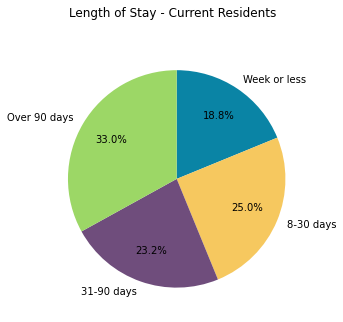

In [4]:
colors = ['#0a84a5', '#f6c85f', '#6f4d7c', '#9cd766', '#ca472f', '#ff9f56', '#8cddd0', ]

y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Length of Stay - Current Residents", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/all-current-residents-length-of-stay.png', bbox_inches='tight')

In [5]:
stays = pd.read_sql_query('select * from stays_summarized where end_date is null and is_pretrial = 1 and not_primary_custodian = 0;', cnx)
stays

,defendant_id,name,gender,race,start_date,end_date,days,max_level,is_pretrial,violent,dwi,drugs,not_primary_custodian,violation,use_flag
0,8055,"JEFFRIES, DARRYL LYNDON III",M,B,2022-01-03,None,784.0,14,1,1,0,0,0,0,0
1,9995,"WROTEN, RICHIE DION",M,B,2022-01-07,None,780.0,5,1,1,0,0,0,0,1
2,20991,"JONES, JALIA LOVE",F,B,2022-01-31,None,756.0,14,1,1,0,0,0,0,1
3,60962,"MATTHEWS, CHANTARICA NASHA",F,B,2022-05-03,None,664.0,14,1,1,0,0,0,0,1
4,60963,"MATTHEWS, INGA JANINE TORRENCE",F,B,2022-05-03,None,664.0,14,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,341440,"LOGAN, WILLIAM THEORDORE III",M,W,2024-02-25,None,1.0,4,1,1,0,0,0,0,1
342,341513,"PERTILLER, ANDRE",M,B,2024-02-25,None,1.0,9,1,1,0,0,0,0,1
343,341539,"RICE, BLAINE VINSON",M,W,2024-02-25,None,1.0,6,1,0,0,1,0,0,1
344,341574,"SIMMONS, SEAN MATTHEW",M,W,2024-02-25,None,1.0,7,1,0,0,0,0,0,1


In [6]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
y

,
Week or less,60
8-30 days,83
31-90 days,88
Over 90 days,115


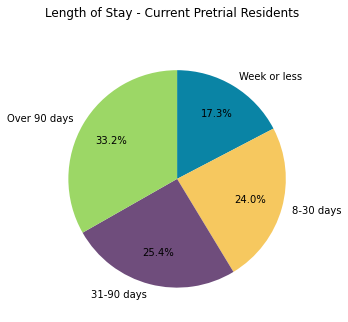

In [7]:
y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Length of Stay - Current Pretrial Residents", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-current-residents-length-of-stay.png', bbox_inches='tight')

In [8]:
stays = pd.read_sql_query('select * from stays_summarized where is_pretrial = 1 and not_primary_custodian = 0;', cnx)
stays

,defendant_id,name,gender,race,start_date,end_date,days,max_level,is_pretrial,violent,dwi,drugs,not_primary_custodian,violation,use_flag
0,40017,"ALLEN, AMANDA MARIE",F,W,2022-03-16,2022-03-18,3.0,6,1,1,0,1,0,0,1
1,89376,"ANDERSON, PERRY URIAH",M,W,2022-07-04,2022-07-27,24.0,5,1,0,0,1,0,0,1
2,158035,"CARITHERS, NEIL ARTHUR",M,W,2022-12-02,2022-12-13,12.0,0,1,0,0,0,0,0,1
3,8084,"LIPE, RICHARD ALLEN II",M,W,2022-01-03,2023-11-28,695.0,13,1,1,0,0,0,0,0
4,158089,"ELSWICK, VANESSA SHALYNN",F,W,2022-12-02,2022-12-09,8.0,6,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,341513,"PERTILLER, ANDRE",M,B,2024-02-25,None,1.0,9,1,1,0,0,0,0,1
9126,341539,"RICE, BLAINE VINSON",M,W,2024-02-25,None,1.0,6,1,0,0,1,0,0,1
9127,341574,"SIMMONS, SEAN MATTHEW",M,W,2024-02-25,None,1.0,7,1,0,0,0,0,0,1
9128,341649,"WOLDEGHEBRIEL, AMANN T W",M,B,2024-02-25,None,1.0,2,1,0,1,0,0,0,1


In [9]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
y

,
Week or less,5266
8-30 days,1959
31-90 days,1269
Over 90 days,636


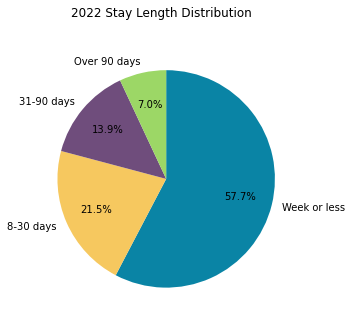

In [10]:
y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="2022 Stay Length Distribution", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-2022-residents-length-of-stay.png', bbox_inches='tight')